In [1]:
#import
import pickle
import json
import sklearn_json as skljson
import pickle
import pandas as pd
from IPython.display import display
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score

from IPython.display import display
from ydata_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# : Load dataset

In [2]:
pd.set_option('display.max_columns', None)
data =  pd.read_excel('hotel_revenue_historical_full.xlsx')
df= data.copy()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,20,2019,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,119.00,0,0,Canceled,2018-12-22
1,Resort Hotel,1,76,2019,January,1,1,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,57.90,0,1,Canceled,2018-12-20
2,Resort Hotel,1,113,2019,January,1,2,0,1,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,305.0,NaN,0,Transient,72.00,0,0,Canceled,2018-11-16
3,Resort Hotel,1,113,2019,January,1,2,0,1,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,305.0,NaN,0,Transient,72.00,0,0,Canceled,2018-11-16
4,Resort Hotel,1,113,2019,January,1,2,0,1,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,305.0,NaN,0,Transient,72.00,0,0,Canceled,2018-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79259,Resort Hotel,1,61,2019,March,10,1,4,10,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,171.0,NaN,0,Transient,29.00,0,0,Check-Out,2019-01-06
79260,Resort Hotel,1,219,2019,March,10,2,2,5,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,310.0,NaN,0,Transient,52.00,0,0,Check-Out,2018-11-20
79261,Resort Hotel,1,219,2019,March,10,2,2,5,2,0.0,0,HB,CN,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,310.0,NaN,0,Transient,52.00,0,0,Check-Out,2018-11-20
79262,Resort Hotel,1,219,2019,March,10,2,2,5,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,310.0,NaN,0,Transient,52.00,0,0,Check-Out,2018-11-20


In [108]:
df_encoded['pca_column']

0        0.171579
1       -0.489285
2       -0.034274
3       -0.034274
4       -0.034274
           ...   
79259   -0.770159
79260   -0.841001
79261   -0.820361
79262   -0.841009
79263   -0.721472
Name: pca_column, Length: 79264, dtype: float64

In [3]:
import pickle

with open('dataset.pkl', 'wb') as f:
    pickle.dump(df, f)


In [4]:
# Profil oluştur
#profile = ProfileReport(data, title='DataFrame Profili', explorative=True)
# Profili HTML dosyasına kaydet
#profile.to_file("dataframe_profil.html")

# Remove unnecessary

# : Discarding Outliers, : CLIPPING, REMOVING

We remove the outliers by using conditionals to get and update these values.



In [5]:
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

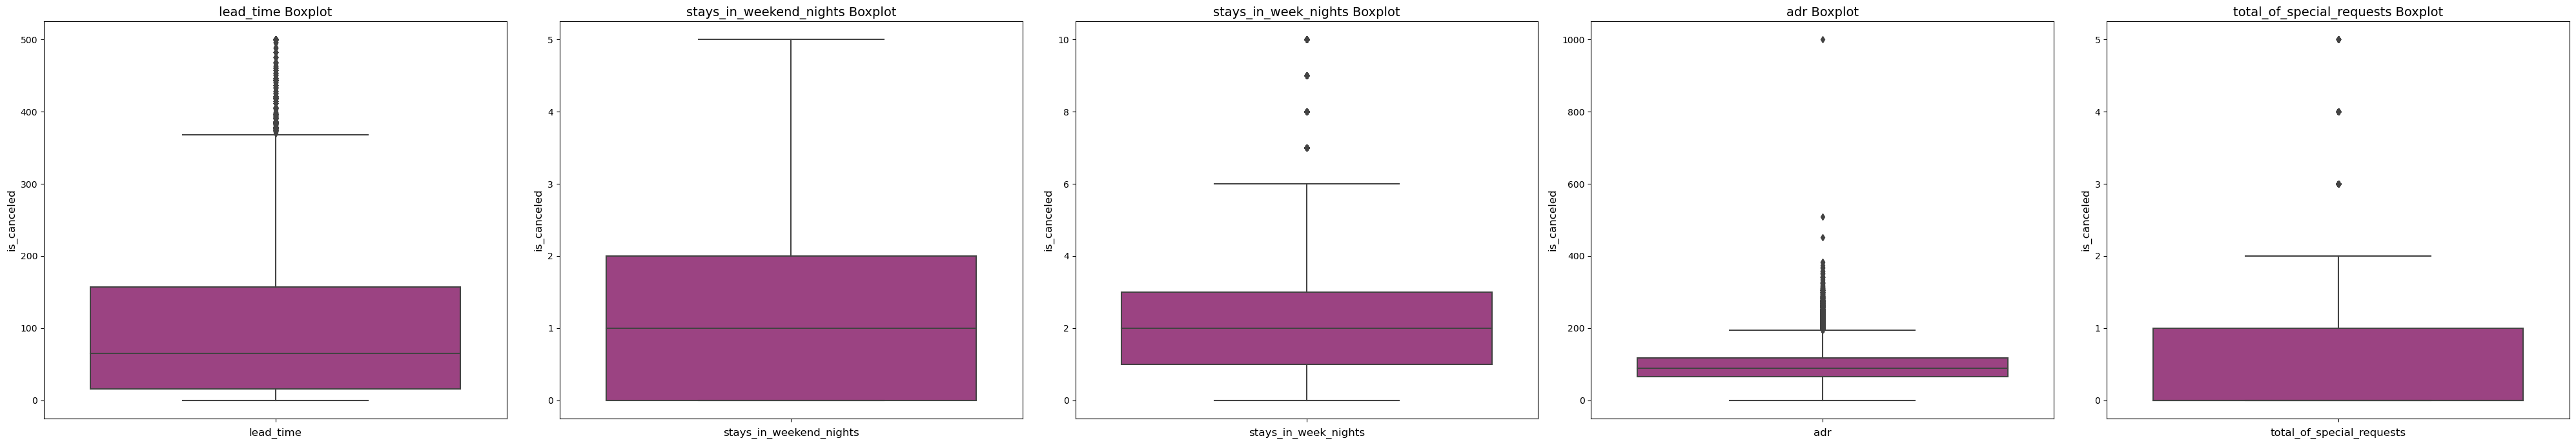

In [6]:
columns_name = [  'lead_time',  
       'stays_in_weekend_nights', 'stays_in_week_nights', 
       'adr', 'total_of_special_requests']
colors = ['#AA3488']

fig, axes = plt.subplots(1, 5, figsize=(40, 7))

for i, column in enumerate(columns_name):
    sns.boxplot(ax=axes[i], y=column, data=df, palette=colors)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('is_canceled', fontsize=12)
    axes[i].set_title(column + ' Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

In [7]:
dff=df.select_dtypes(exclude='object')
def outlier_treatment(datacolumn):
    sorted_data = np.sort(datacolumn)  # Convert the list to a NumPy array and then sort
    Q1, Q3 = np.percentile(sorted_data, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming you have the DataFrame 'df' and you want to treat outliers for each column
for col in columns_name:
    lowerbound, upperbound = outlier_treatment(dff[col].values)
    df[col] = np.clip(df[col], a_min=lowerbound, a_max=upperbound)


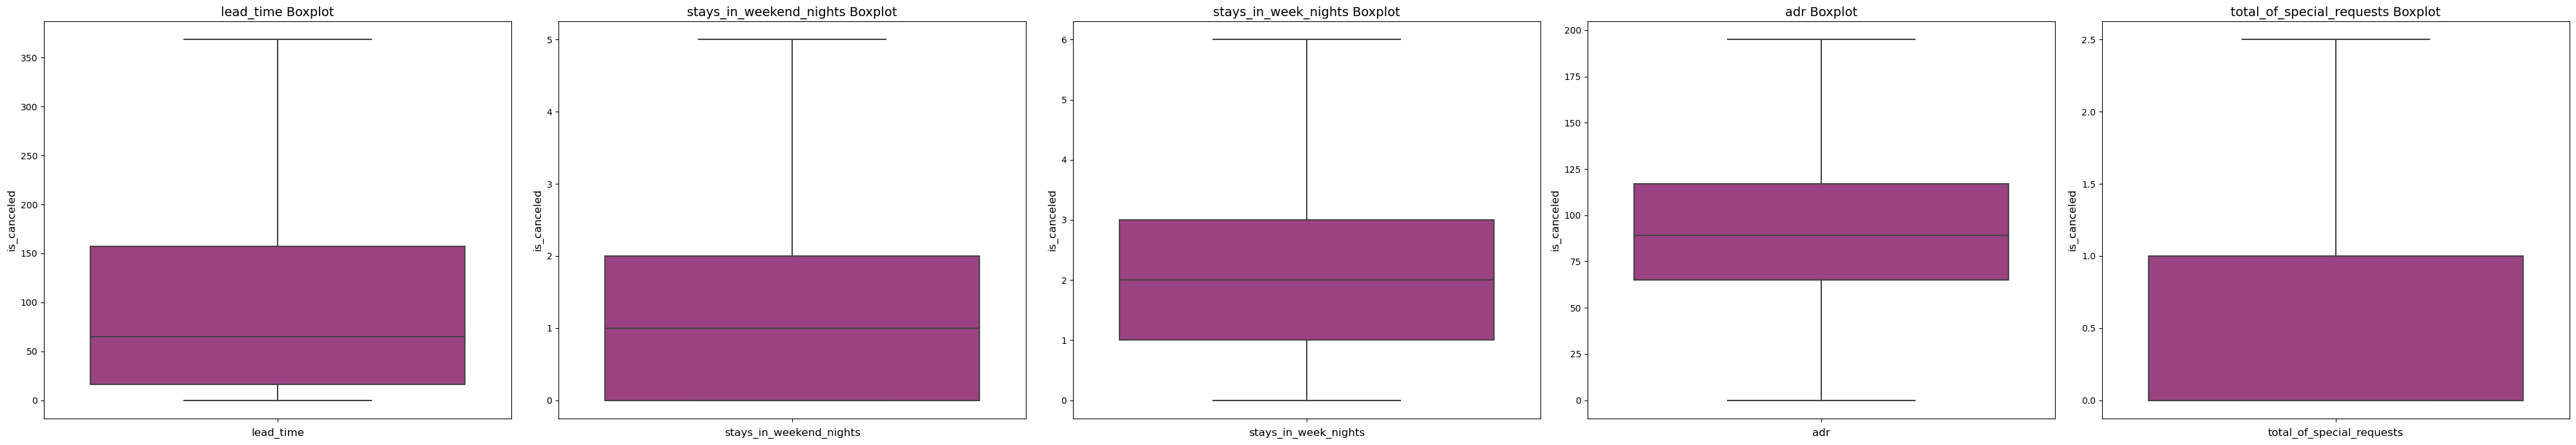

In [8]:
columns_name = [  'lead_time',  
       'stays_in_weekend_nights', 'stays_in_week_nights', 
       'adr', 'total_of_special_requests']
colors = ['#AA3488']

fig, axes = plt.subplots(1, 5, figsize=(40, 7))

for i, column in enumerate(columns_name):
    sns.boxplot(ax=axes[i], y=column, data=df, palette=colors)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('is_canceled', fontsize=12)
    axes[i].set_title(column + ' Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

In [9]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    50312
1    28952
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.63474
1    0.36526
Name: is_canceled, dtype: float64


# Filling empties, drop + fillwith0 + fillwithmean + fillwithmode

In [10]:
# checking for null values 

null_values = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null_values

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [11]:
del df['company'] # gereksiz
del df['agent'] # gereksiz

## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)

## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

In [12]:
df['customer_type'].unique()

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

#### Adults, babies, and children can’t be zero at the same time

In [13]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0) 
df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,20.0,2019,January,1,1,0,2.0,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,119.00,0,0.0,Canceled,2018-12-22
1,Resort Hotel,1,76.0,2019,January,1,1,1,2.0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,57.90,0,1.0,Canceled,2018-12-20
2,Resort Hotel,1,113.0,2019,January,1,2,0,1.0,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,0,Transient,72.00,0,0.0,Canceled,2018-11-16
3,Resort Hotel,1,113.0,2019,January,1,2,0,1.0,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,0,Transient,72.00,0,0.0,Canceled,2018-11-16
4,Resort Hotel,1,113.0,2019,January,1,2,0,1.0,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,0,Transient,72.00,0,0.0,Canceled,2018-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79259,Resort Hotel,1,61.0,2019,March,10,1,4,6.0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,29.00,0,0.0,Check-Out,2019-01-06
79260,Resort Hotel,1,219.0,2019,March,10,2,2,5.0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,52.00,0,0.0,Check-Out,2018-11-20
79261,Resort Hotel,1,219.0,2019,March,10,2,2,5.0,2,0.0,0,HB,CN,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,52.00,0,0.0,Check-Out,2018-11-20
79262,Resort Hotel,1,219.0,2019,March,10,2,2,5.0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,52.00,0,0.0,Check-Out,2018-11-20


# Visualization

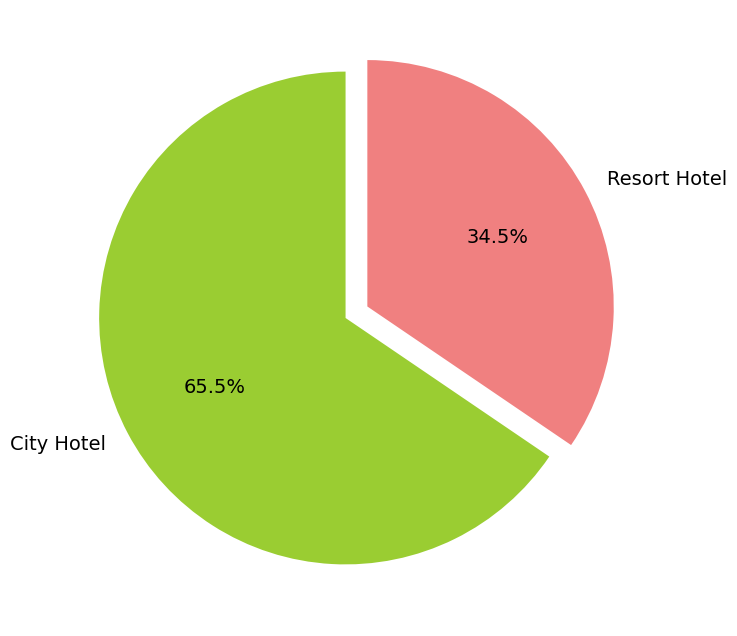

In [14]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

#  colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

In [15]:
top_countries_with_codes = df.country.value_counts().head(10)
top_countries_with_codes

PRT    36115
GBR     6943
FRA     6542
ESP     5975
DEU     4391
ITA     2461
IRL     1972
BEL     1345
NLD     1300
BRA     1215
Name: country, dtype: int64

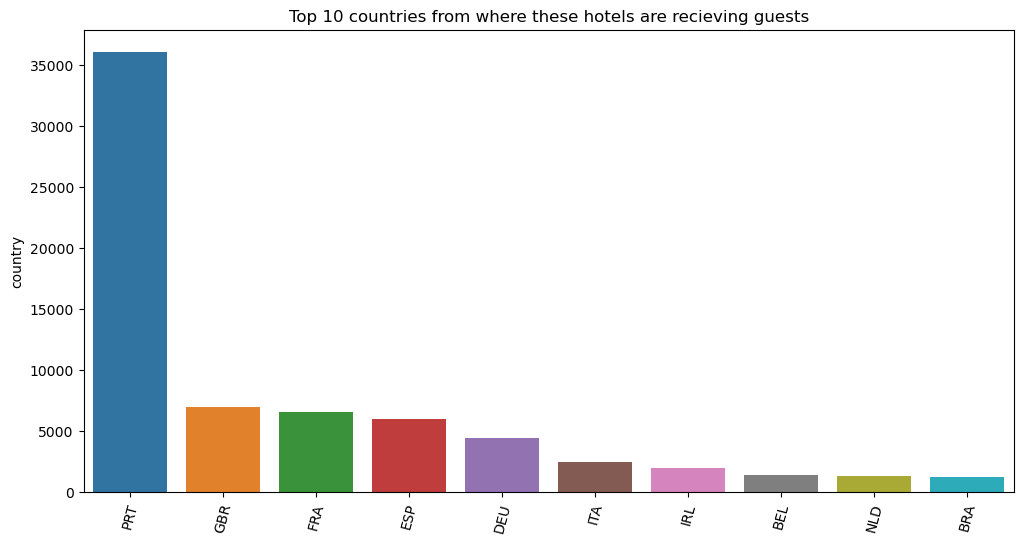

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are recieving guests')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes);

In [17]:
resort_hotel = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city_hotel = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [18]:
# Counting adults and children as paying guests only, not babies.

resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])

C:\Users\Mazi\AppData\Local\Temp\ipykernel_20352\2940944721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_hotel["adr_pp"] = resort_hotel["adr"] / (resort_hotel["adults"] + resort_hotel["children"])


In [19]:
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)

In [20]:
city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])

C:\Users\Mazi\AppData\Local\Temp\ipykernel_20352\4186880703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel["adr_pp"] = city_hotel["adr"] / (city_hotel["adults"] + city_hotel["children"])


In [21]:
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

In [22]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 44.21 € per night and person.
City hotel: 56.73 € per night and person.


# How many guests are there who have repeatedly canceled the bookings?

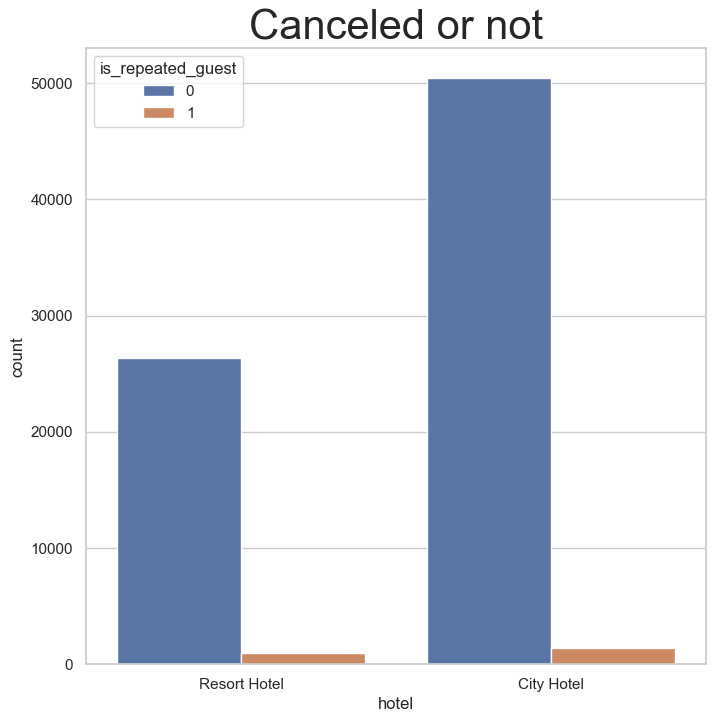

In [23]:
sns.set(style = "whitegrid")
plt.title("Canceled or not", fontdict = {'fontsize': 30})
canceled = sns.countplot(x = df.hotel, hue = 'is_repeated_guest', data = df)

### What is the effects of deposit on cancellations by segments.

Let’s check the countplot distribution by cancellation in those market segments.

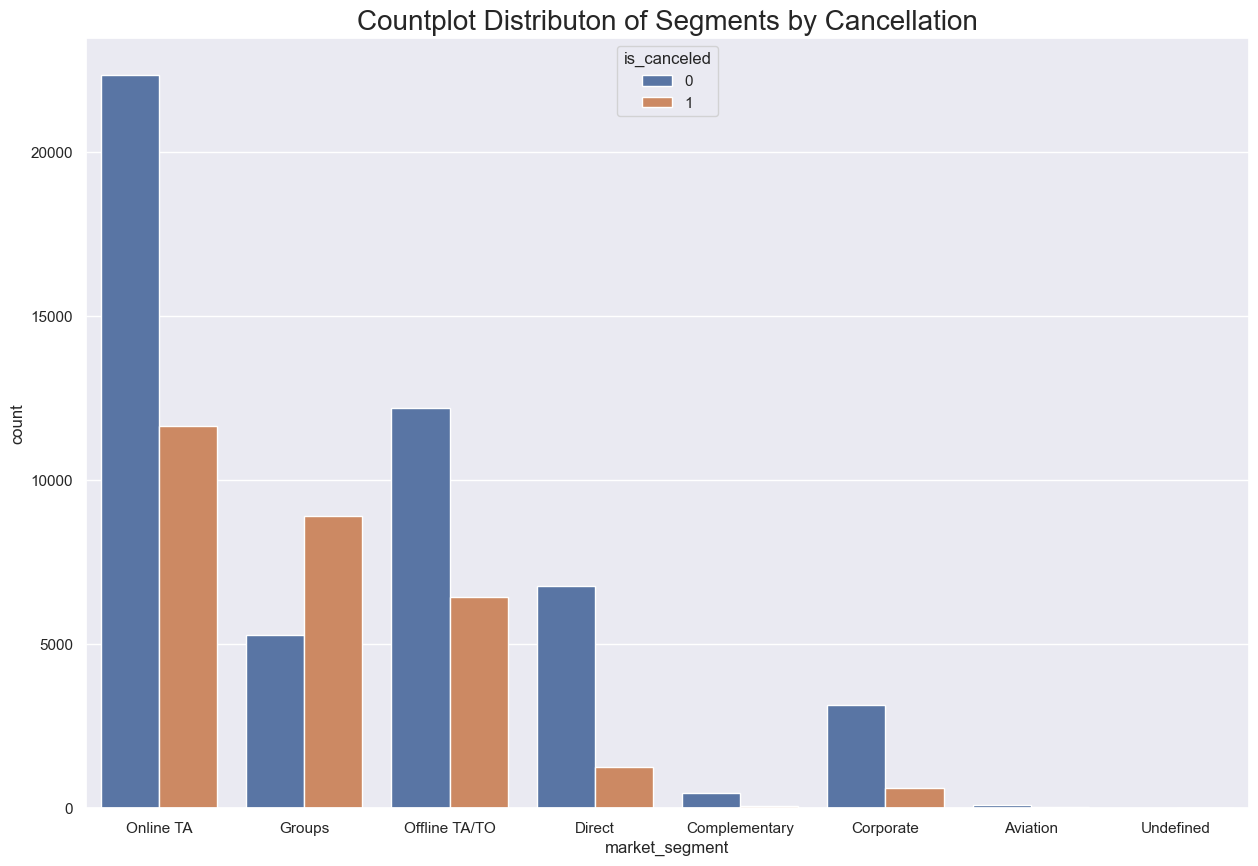

In [24]:
plt.figure(figsize = (15,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

### What is the monthly customers each hotel is receiving?

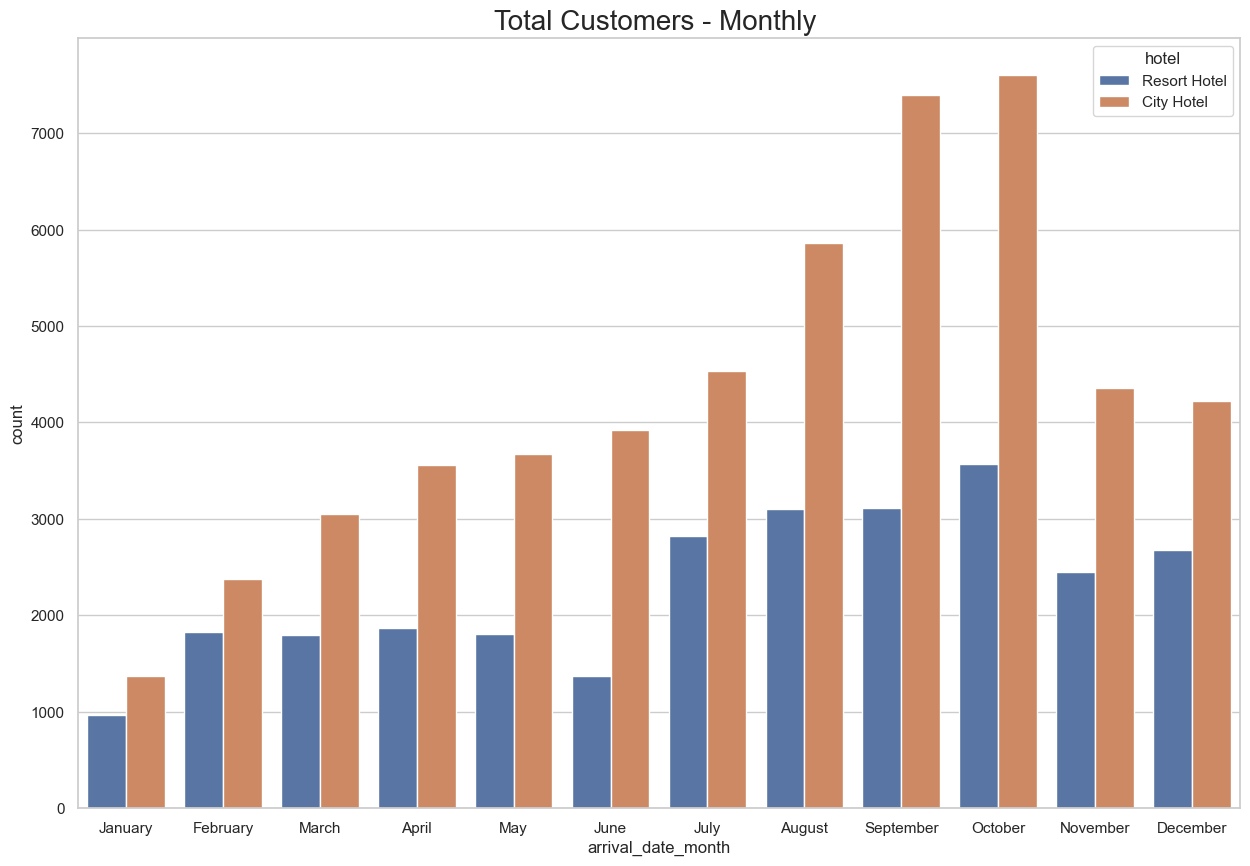

In [25]:
plt.figure(figsize =(15,10))
sns.set(style="whitegrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df)

### Which are the most busy month?



In [26]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

In [27]:
# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [28]:
# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.
From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

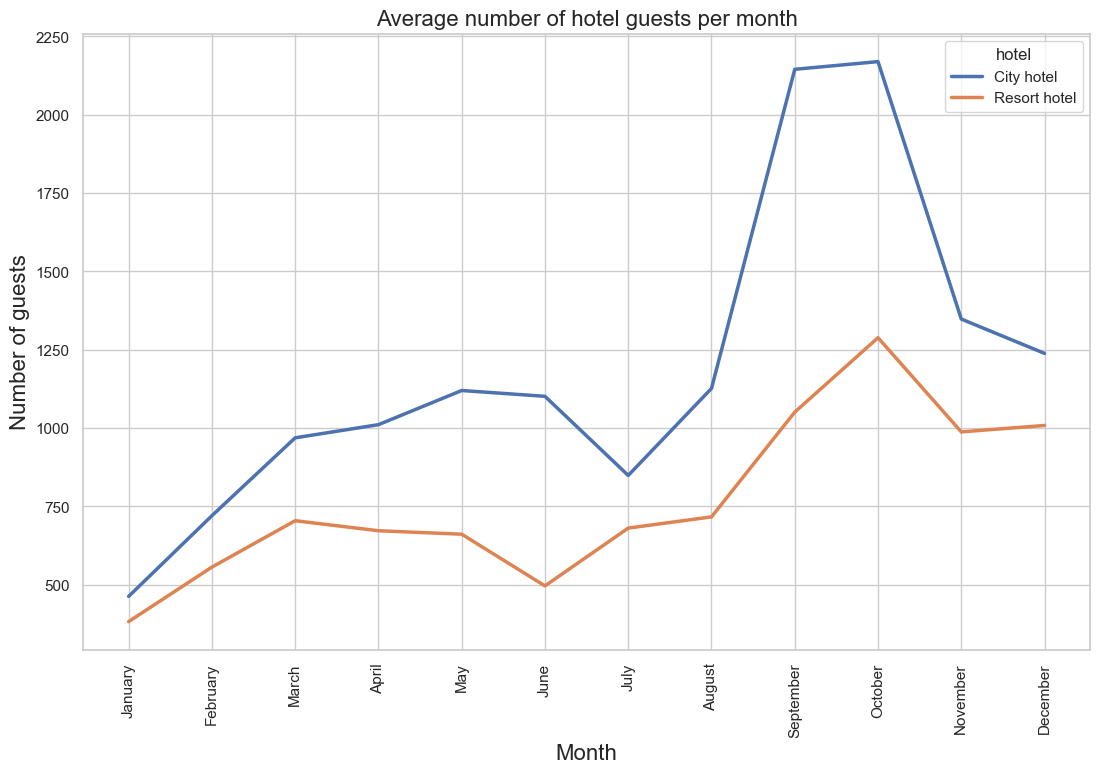

In [29]:
#show figure:
plt.figure(figsize=(13, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

#  How many bookings were canceled?

In [30]:
# absolute cancelations:
total_cancelations = df["is_canceled"].sum()
resort_cancelations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

In [31]:
# as percent:
rel_cancel = total_cancelations / df.shape[0] * 100
rh_rel_cancel = resort_cancelations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_cancelations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

In [32]:
print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {city_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 28,952 (37 %)
Resort hotel bookings canceled: 7,538 (28 %)
City hotel bookings canceled: 21,414 (41 %)


# Feature encoding

In [33]:
cost_dict = {"BB": 12.99, "HB": 17.99, "FB": 21.99, "SC": 35}
df['cost_meal'] = df['meal'].map(cost_dict)

In [34]:
hotel_mapping = {'Resort Hotel': 1, 'City Hotel': 0}
df['hotel'] = df['hotel'].map(hotel_mapping)

In [35]:
#Toplam qaldiqlari gece
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_canceled'].corr(df['total_stays'])

0.0020778275905569007

In [36]:
# Toplam Misafir Sayısı
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['is_canceled'].corr(df['total_guests'])

0.030676893066530472

In [37]:
# Odalara arasindaki ferq
df['room_type_change'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
df['is_canceled'].corr(df['room_type_change'])

-0.2699065982592754

In [38]:
#toplam iptal
#df['cancellation_rate'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'])
#del df['cancellation_rate']

In [39]:
df['stay_type'] = np.where((df['stays_in_weekend_nights'] > 0) & (df['stays_in_week_nights'] > 0), 1, 0)             #  Sadece Hafta Sonu veya Hafta İçi = 0, Hafta Sonu ve Hafta İçi = 1
df['is_canceled'].corr(df['stay_type'])

0.009168296159458866

In [40]:
df['booking_season'] = np.where(df['lead_time'] <= 30, 'Spring', np.where(df['lead_time'] <= 60, 'Autumn', 'Winter'))
df['booking_season'].unique()

array(['Spring', 'Winter', 'Autumn'], dtype=object)

In [41]:
# nece gun evvelden rezerv edilmesi
def booking_type(lead_time):
    if lead_time <= 7:
        return 'Last Minute'
    elif 7 < lead_time <= 30:
        return 'Intermediate Time'
    else:
        return 'Early Booking'

df['booking_type'] = df['lead_time'].apply(booking_type)
df['booking_type']


0        Intermediate Time
1            Early Booking
2            Early Booking
3            Early Booking
4            Early Booking
               ...        
79259        Early Booking
79260        Early Booking
79261        Early Booking
79262        Early Booking
79263        Early Booking
Name: booking_type, Length: 79264, dtype: object

In [42]:
df['deposit_adr_ratio'] = df['adr'] / np.where(df['deposit_type'] == 'No Deposit', 1, 0)
del df['deposit_adr_ratio']

In [43]:
df['total_cost'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights']) + df['cost_meal']
df['is_canceled'].corr(df['total_cost'])

0.016656420641217803

In [44]:
def price_category(adr_value):
    if adr_value < 100:
        return 'low'
    elif 100 <= adr_value < 200:
        return 'Medium'
    else:
        return 'High'

df['price_category'] = df['adr'].apply(price_category)
df['price_category']

0        Medium
1           low
2           low
3           low
4           low
          ...  
79259       low
79260       low
79261       low
79262       low
79263       low
Name: price_category, Length: 79264, dtype: object

In [45]:
df['daily_price_change'] = df.groupby('reservation_status_date')['adr'].diff().fillna(0)
df['is_canceled'].corr(df['daily_price_change'])

0.0023658310738808607

In [46]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'cost_meal',
       'total_stays', 'total_guests', 'room_type_change', 'stay_type',
       'booking_season', 'booking_type', 'total_cost', 'price_category',
       'daily_price_change'],
      dtype='object')

In [47]:
# Season
spring_months = ['March', 'April', 'May']
summer_months = ['June', 'July', 'August']
autumn_months = ['September', 'October', 'November']

# new column
df['season'] = df['arrival_date_month'].apply(lambda x: 'Spring' if x in spring_months else ('Summer' if x in summer_months else ('Autumn' if x in autumn_months else 'Winter')))
df['season'] 

df['is_peak_season'] = df['season'].apply(lambda x: 1 if x == 'Summer' else 0)
df['is_canceled'].corr(df['is_peak_season'])


0.02346675780533694

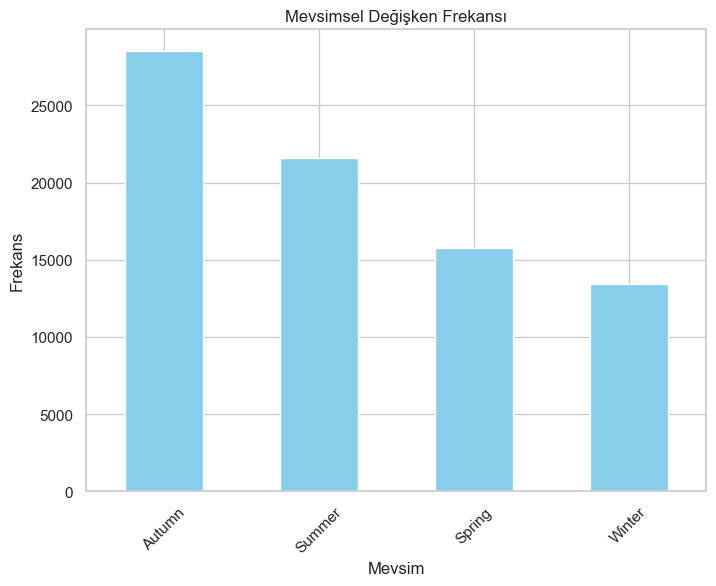

In [48]:
# Mevsimsel değişkenin frekansını hesaplayın
season_counts = df['season'].value_counts()

# Çizim yapın
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Mevsimsel Değişken Frekansı')
plt.xlabel('Mevsim')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

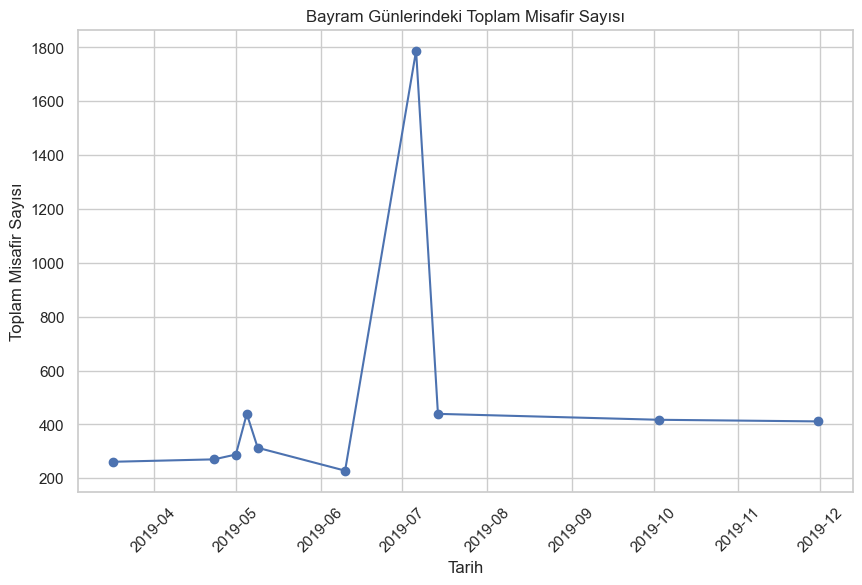

In [49]:
df['reservation_day_of_week'] = df['reservation_status_date'].dt.strftime('%A')

daily_guest_counts = df.groupby('reservation_day_of_week')['total_guests'].sum().reset_index()
# en cox gelen musteri 
max_guests_day = daily_guest_counts[daily_guest_counts['total_guests'] == daily_guest_counts['total_guests'].max()]['reservation_day_of_week'].values[0]


seasonal_guest_counts = df.groupby('season')['total_guests'].sum().reset_index()

max_guests_season = seasonal_guest_counts[seasonal_guest_counts['total_guests'] == seasonal_guest_counts['total_guests'].max()]['season'].values[0]


holidays = ['2019-05-09', '2019-03-17', '2019-05-01', '2019-04-23', '2019-07-14', '2019-10-03', '2019-06-10', '2019-05-05', '2019-07-06', '2019-11-30']

df['is_holiday'] = df['reservation_status_date'].isin(holidays).astype(int)


holiday_guest_counts = df[df['is_holiday'] == 1].groupby('reservation_status_date')['total_guests'].sum().reset_index()


holiday_guest_counts['reservation_status_date'] = pd.to_datetime(holiday_guest_counts['reservation_status_date'])


plt.figure(figsize=(10, 6))
plt.plot(holiday_guest_counts['reservation_status_date'], holiday_guest_counts['total_guests'], marker='o', linestyle='-', color='b')
plt.title('Bayram Günlerindeki Toplam Misafir Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Toplam Misafir Sayısı')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [50]:
season_cancellations = df.groupby(['season', 'is_canceled']).size().unstack(fill_value=0).reset_index()
print(season_cancellations)

is_canceled  season      0      1
0            Autumn  17980  10515
1            Spring  10277   5469
2            Summer  13316   8291
3            Winter   8739   4677


In [52]:
df['distribution_channel_frequency'] = df.groupby('distribution_channel')['distribution_channel'].transform('count')
df['is_canceled'].corr(df['distribution_channel_frequency'])

0.17116330518667955

In [ ]:
del df['arrival_date_month']
del df['reservation_status_date']
del df['reservation_status']


In [54]:
#target encode
dict_ = df.groupby('market_segment')['is_canceled'].mean().to_dict()
df['market_segment']=df['market_segment'].map(dict_)
dict_ = df.groupby('distribution_channel')['is_canceled'].mean().to_dict()
df['distribution_channel']=df['distribution_channel'].map(dict_)
dict_ = df.groupby('meal')['is_canceled'].mean().to_dict()
df['meal']=df['meal'].map(dict_)
dict_ = df.groupby('price_category')['is_canceled'].mean().to_dict()
df['price_category']=df['price_category'].map(dict_)
dict_ = df.groupby('customer_type')['is_canceled'].mean().to_dict()
df['customer_type']=df['customer_type'].map(dict_)

# Transform


In [55]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# # Create a copy of the DataFrame to avoid overwriting the original
df_encoded = df.copy()

# # Iterate through the columns of the DataFrame 'df'
for column in df.columns:
    # Check if the data type of the column is 'object' (typically representing categorical data)
    if df[column].dtype == object:
        # Use LabelEncoder to transform the categorical values into numerical labels
         df_encoded[column] = encoder.fit_transform(df[column].values.reshape(-1, 1))




c:\Users\Mazi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:

with open('df_encoded.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)


# Normalize

In [57]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)
data_col= df_encoded.columns
df_encoded=pd.DataFrame(scaled_data,columns=data_col)

In [58]:
# Ölçeklenmiş veriyi pickle olarak kaydet
with open('scaled_data.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)


In [59]:
df_encoded

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,cost_meal,total_stays,total_guests,room_type_change,stay_type,booking_season,booking_type,total_cost,price_category,daily_price_change,season,is_peak_season,reservation_day_of_week,is_holiday,distribution_channel_frequency
0,1.0,1.0,0.054274,0.0,0.000000,0.000000,0.0,0.333333,0.5,0.666667,0.0,0.201328,0.767296,0.253094,0.36123,0.0,0.0,0.0,0.666667,0.545455,0.0,0.0,0.0,1.0,0.610256,0.0,0.0,0.000000,0.181818,0.8,0.0,0.0,0.5,0.5,0.110698,1.0,0.500000,1.000000,0.0,0.333333,0.0,1.000000
1,1.0,1.0,0.206242,0.0,0.000000,0.000000,0.2,0.333333,0.5,0.000000,0.0,0.201328,0.767296,0.253094,0.36123,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.296923,0.0,0.4,0.000000,0.272727,0.4,0.0,1.0,1.0,0.0,0.080791,0.0,0.500000,1.000000,0.0,0.666667,0.0,1.000000
2,1.0,1.0,0.306649,0.0,0.000000,0.033333,0.0,0.166667,0.5,0.000000,0.0,0.179140,0.767296,0.577737,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.369231,0.0,0.0,0.227169,0.090909,0.4,0.0,0.0,1.0,0.0,0.035814,0.0,0.500000,1.000000,0.0,0.000000,0.0,0.149709
3,1.0,1.0,0.306649,0.0,0.000000,0.033333,0.0,0.166667,0.5,0.000000,0.0,0.179140,0.767296,0.577737,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.369231,0.0,0.0,0.227169,0.090909,0.4,0.0,0.0,1.0,0.0,0.035814,0.0,0.500000,1.000000,0.0,0.000000,0.0,0.149709
4,1.0,1.0,0.306649,0.0,0.000000,0.033333,0.0,0.166667,0.5,0.000000,0.0,0.179140,0.767296,0.577737,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.369231,0.0,0.0,0.227169,0.090909,0.4,0.0,0.0,1.0,0.0,0.035814,0.0,0.500000,1.000000,0.0,0.000000,0.0,0.149709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79259,1.0,1.0,0.165536,0.0,0.173077,0.000000,0.8,1.000000,0.5,0.000000,0.0,0.201328,0.767296,0.256029,0.36123,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.148718,0.0,0.0,0.000000,0.909091,0.4,0.0,1.0,1.0,0.0,0.134884,0.0,0.451282,0.333333,0.0,0.500000,0.0,1.000000
79260,1.0,1.0,0.594301,0.0,0.173077,0.033333,0.4,0.833333,0.5,0.000000,0.0,0.179140,0.767296,0.256029,0.36123,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.266667,0.0,0.0,0.227169,0.636364,0.4,0.0,1.0,1.0,0.0,0.171628,0.0,0.467179,0.333333,0.0,0.833333,0.0,1.000000
79261,1.0,1.0,0.594301,0.0,0.173077,0.033333,0.4,0.833333,0.5,0.000000,0.0,0.179140,0.201258,0.256029,0.36123,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.266667,0.0,0.0,0.227169,0.636364,0.4,0.0,1.0,1.0,0.0,0.171628,0.0,0.500000,0.333333,0.0,0.833333,0.0,1.000000
79262,1.0,1.0,0.594301,0.0,0.173077,0.033333,0.4,0.833333,0.5,0.000000,0.0,0.179140,0.767296,0.256029,0.36123,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5,0.0,1.0,0.266667,0.0,0.0,0.227169,0.636364,0.4,0.0,1.0,1.0,0.0,0.171628,0.0,0.500000,0.333333,0.0,0.833333,0.0,1.000000


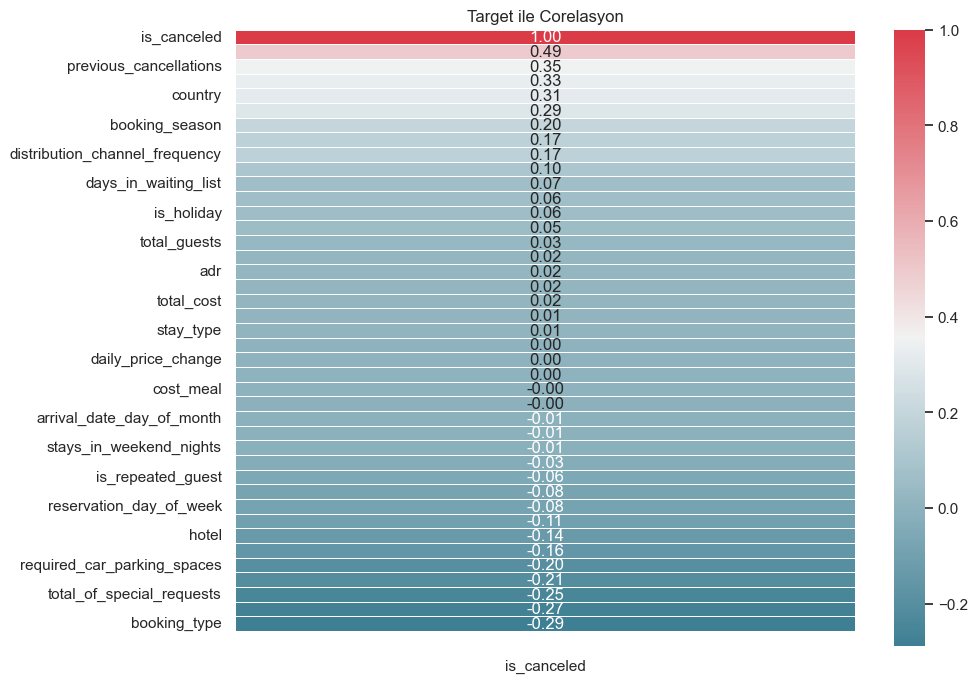

In [60]:
corr = df_encoded.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False)

# Renk paletini tanımlayın
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap oluşturun
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Target ile Corelasyon")
plt.show()


In [61]:
del df_encoded['arrival_date_year']


# Feature mining + tenure

In [62]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79264 entries, 0 to 79263
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79264 non-null  float64
 1   is_canceled                     79264 non-null  float64
 2   lead_time                       79264 non-null  float64
 3   arrival_date_week_number        79264 non-null  float64
 4   arrival_date_day_of_month       79264 non-null  float64
 5   stays_in_weekend_nights         79264 non-null  float64
 6   stays_in_week_nights            79264 non-null  float64
 7   adults                          79264 non-null  float64
 8   children                        79264 non-null  float64
 9   babies                          79264 non-null  float64
 10  meal                            79264 non-null  float64
 11  country                         79264 non-null  float64
 12  market_segment                  

#### lead_time

In [63]:
target='is_canceled'

df_encoded['lead_time'] = np.sqrt( df_encoded['lead_time'])
#df_encoded['lead_time'] = df_encoded['lead_time'].apply(lambda value: 0 if value == 0 else np.log(value))
#df_encoded['lead_time'] = np.power( df_encoded['lead_time'],1.5)
df_encoded['lead_time'].corr(df_encoded[target])



0.34284504772394797

#### required_car_parking_spaces

In [64]:
df_encoded['required_car_parking_spaces'] = np.power( df_encoded['required_car_parking_spaces'],2)
df_encoded['required_car_parking_spaces'].corr(df_encoded[target])

-0.19736899588325427

#### total_of_special_requests

In [65]:

df_encoded['total_of_special_requests'] = np.sqrt( df_encoded['total_of_special_requests'])
#df_encoded['cost_meal'] = df_encoded['cost_meal'].apply(lambda value: 0 if value == 0 else np.log(value))
#df_encoded['total_of_special_requests'] = np.power( df_encoded['total_of_special_requests'],3)
df_encoded['total_of_special_requests'].corr(df_encoded[target])


-0.27452513786994487

# New PCA column

In [66]:
# calc corr target vs other columns
correlations = df_encoded.corr()['is_canceled'].abs().sort_values()
low_correlation_columns = correlations.index[:15]
low_corr_df = df_encoded[low_correlation_columns]
low_corr_df.isnull().sum()

cost_meal                    789
total_stays                    0
daily_price_change             0
season                         0
arrival_date_week_number       0
arrival_date_day_of_month      0
stay_type                      0
children                       0
stays_in_week_nights           0
stays_in_weekend_nights        0
total_cost                   789
price_category                 0
adr                            0
is_peak_season                 0
babies                         0
dtype: int64

In [67]:
# Eksik değerleri doldurmak için örnek kod (ortalama ile doldurma)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# veya eksik değerleri kaldırmak için örnek kod
df_encoded.dropna(inplace=True)


In [68]:

# Create a PCA model
pca = PCA(n_components=1)

# Apply PCA 
new= pca.fit_transform(df_encoded)

# add new column
df_encoded['pca_column'] = new

In [69]:

# PCA sonucu elde edilen veri çerçevesini pickle olarak kaydet
with open('pca_data.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)


In [70]:
df_encoded['pca_column'].corr(df_encoded['is_canceled'])

-0.6326411154294118

# New LDA column

In [71]:
clf = LinearDiscriminantAnalysis()
clf.fit( df_encoded.drop(columns=['is_canceled']), df_encoded['is_canceled']  )
df_encoded['lda_column'] = clf.predict( df_encoded.drop(columns=['is_canceled']) )
df_encoded['lda_column'].corr(df_encoded['is_canceled'])


0.7058913987174962

In [72]:

# Veri çerçevesini pickle olarak kaydet
with open('df_encoded_with_lda.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)


In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79264 entries, 0 to 79263
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79264 non-null  float64
 1   is_canceled                     79264 non-null  float64
 2   lead_time                       79264 non-null  float64
 3   arrival_date_week_number        79264 non-null  float64
 4   arrival_date_day_of_month       79264 non-null  float64
 5   stays_in_weekend_nights         79264 non-null  float64
 6   stays_in_week_nights            79264 non-null  float64
 7   adults                          79264 non-null  float64
 8   children                        79264 non-null  float64
 9   babies                          79264 non-null  float64
 10  meal                            79264 non-null  float64
 11  country                         79264 non-null  float64
 12  market_segment                  

# Kmeans

In [74]:

selected_columns = ['hotel', 'country', 'lead_time', 'reserved_room_type', 'price_category','season','required_car_parking_spaces']
clustr = df_encoded[selected_columns]



In [75]:
#! kodu calistirdikta gec run oluyorr
from sklearn.metrics import silhouette_score  # en iyi cluster sayini bulmak icin silhouette_score kullaniyorum
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(clustr)
    silhouette_avg = silhouette_score(clustr, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)


KeyboardInterrupt: 

In [76]:

kmeans = KMeans(n_clusters=8).fit(clustr)   # sectiyimiz columlar uzerinde kmeans olusturuyoruz
df_encoded['labels'] = kmeans.labels_

In [77]:
import pickle

# Veri çerçevesini pickle olarak kaydet
with open('df_encoded_with_kmeans.pkl', 'wb') as f:
    pickle.dump(df_encoded, f)


In [78]:
da = df_encoded.groupby(by=['labels']).mean()
da

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,cost_meal,total_stays,total_guests,room_type_change,stay_type,booking_season,booking_type,total_cost,price_category,daily_price_change,season,is_peak_season,reservation_day_of_week,is_holiday,distribution_channel_frequency,pca_column,lda_column
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.764821,0.836934,0.586358,0.475266,0.125104,0.335529,0.466547,0.003131,0.000366,0.198622,0.737175,0.444109,0.355719,0.024640,0.357404,0.004635,0.004852,0.012553,0.018931,0.273847,0.039309,0.829240,0.365373,0.000203,0.077390,0.042812,0.239881,0.375262,0.038058,0.424860,0.999512,0.000000,0.089986,0.0,0.485964,0.338985,0.361430,0.523014,0.050988,0.986165,-0.656121,0.757624
1,0.0,0.377028,0.424825,0.584900,0.485932,0.153620,0.374036,0.508603,0.078989,0.004316,0.195290,0.486618,0.235706,0.311735,0.003568,0.030268,0.004258,0.141878,0.136568,0.040281,0.045460,0.004076,0.922431,0.666216,0.006956,0.363616,0.114989,0.273847,0.456002,0.107607,0.448728,0.691967,0.251065,0.182983,1.0,0.540459,0.729428,0.811716,0.496528,0.043273,0.876696,-0.200054,0.299114
2,1.0,0.262951,0.437289,0.602158,0.502861,0.218411,0.463407,0.444206,0.009800,0.003931,0.207686,0.530446,0.295285,0.253235,0.039148,0.049131,0.050232,0.117601,0.159257,0.056882,0.050468,0.001767,0.867654,0.298388,0.013163,0.238771,0.052639,0.352045,0.362817,0.229778,0.558525,0.684537,0.290386,0.108732,0.0,0.482877,0.130938,0.000000,0.489322,0.027278,0.720314,0.272824,0.174279
3,0.0,0.419392,0.414326,0.618576,0.501999,0.148865,0.352599,0.468406,0.037365,0.002213,0.195367,0.518061,0.268050,0.320590,0.007782,0.052977,0.007425,0.110508,0.115392,0.033457,0.084821,0.010059,0.900661,0.659701,0.003062,0.315064,0.117725,0.259992,0.398029,0.117021,0.437241,0.645580,0.260246,0.173590,1.0,0.534152,0.112214,0.000000,0.480461,0.043838,0.898190,-0.077880,0.335499
4,1.0,0.297775,0.412141,0.605610,0.508125,0.261236,0.545715,0.509889,0.092048,0.014339,0.211447,0.573766,0.211802,0.268145,0.013844,0.019654,0.018541,0.277764,0.252545,0.058714,0.005315,0.001559,0.953088,0.777303,0.022126,0.374943,0.070526,0.416406,0.468875,0.125216,0.664400,0.661928,0.238133,0.318000,1.0,0.543969,0.549197,0.715451,0.515101,0.021632,0.777472,-0.085166,0.245365
5,0.0,0.339868,0.353318,0.528089,0.512416,0.171636,0.351232,0.432509,0.012814,0.003108,0.194498,0.530525,0.257025,0.300478,0.041312,0.088457,0.035192,0.028296,0.050692,0.040815,0.049919,0.007782,0.874519,0.383614,0.002625,0.246437,0.173857,0.269598,0.354939,0.113512,0.474132,0.602180,0.319786,0.106752,0.0,0.469178,0.862994,0.411017,0.509595,0.012145,0.842176,0.081156,0.216028
6,0.0,0.230995,0.346390,0.623940,0.487425,0.164915,0.337846,0.421755,0.007163,0.002603,0.197879,0.503056,0.267768,0.302104,0.061346,0.031904,0.043075,0.031473,0.066553,0.039156,0.017419,0.005707,0.856682,0.391244,0.002325,0.256851,0.163314,0.259241,0.342744,0.159992,0.471173,0.590457,0.272271,0.105195,0.0,0.465434,0.114488,0.000000,0.482707,0.030957,0.843141,0.199448,0.141248
7,1.0,0.272783,0.337025,0.495998,0.454745,0.210306,0.411723,0.448356,0.018705,0.005810,0.222245,0.581389,0.255642,0.269238,0.059327,0.034557,0.062385,0.122137,0.177328,0.040979,0.032416,0.001372,0.915864,0.291498,0.012487,0.300286,0.059063,0.320170,0.372232,0.278287,0.503823,0.658716,0.408716,0.104654,0.0,0.473120,0.923293,0.230122,0.495591,0.017890,0.770625,0.377817,0.174006


In [79]:
da = da.reset_index()
da = dict( zip( da['labels'], da['is_canceled'] ) )


In [80]:
df_encoded['labels'] = df_encoded['labels'].map(da)
print(df_encoded['labels'].corr(df_encoded['is_canceled']))


0.31071057610990777


# Feature Importance

In [81]:

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit( df_encoded.drop(columns=['is_canceled']), df_encoded['is_canceled']  )
cols = df_encoded.drop(columns=['is_canceled']).columns

da = pd.DataFrame(columns = ['index', 'col', 'fi', 'cor'])
for i in range(len(cols)):
    da.loc[len(da)] = [i, cols[i], clf.feature_importances_[i], abs(df_encoded[cols[i]].corr(df_encoded['is_canceled']))]
    print(i, cols[i], clf.feature_importances_[i], df_encoded[cols[i]].corr(df_encoded['is_canceled']))


0 hotel 0.0010346286943707273 -0.13515704747425208
1 lead_time 0.023834890364062156 0.34284504772394797
2 arrival_date_week_number 0.0017870317865742913 0.004928893113633053
3 arrival_date_day_of_month 0.00026328231511099664 -0.00906869016607193
4 stays_in_weekend_nights 0.0052094241308404884 -0.013554677748434916
5 stays_in_week_nights 0.0011197817094464409 0.011450773073908864
6 adults 0.00013379543308949938 0.053001334217275
7 children 8.692559984827156e-05 -0.009212044840259514
8 babies 0.0 -0.02989438510627122
9 meal 0.00045830542360579177 0.0621460786139087
10 country 0.06072458173669663 0.31316847208412435
11 market_segment 0.020128617091989882 0.28979351106648343
12 distribution_channel 0.003316374856644816 0.17266723856938948
13 is_repeated_guest 0.00036718657575850866 -0.06029854419316965
14 previous_cancellations 0.04153524889335096 0.3538147175489732
15 previous_bookings_not_canceled 0.0006567511128539729 -0.10660341572338468
16 reserved_room_type 0.0008218049198325111 -0.0

In [82]:
# feature importance az olan columnlari siliyorum
del df_encoded['required_car_parking_spaces']
del df_encoded['room_type_change']
del df_encoded['assigned_room_type']
del df_encoded['booking_type']
del df_encoded['total_of_special_requests']

In [83]:
# korr az olanlari silirem
threshold = 0.19 
low_corr_columns = correlations[correlations < threshold].index.tolist()
df_encoded.drop(low_corr_columns, axis=1, inplace=True)



In [84]:
X=df_encoded.drop('is_canceled',axis=1)
y=df_encoded['is_canceled']

# drop low corr

C:\Users\Mazi\AppData\Local\Temp\ipykernel_20352\602409462.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_encoded.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

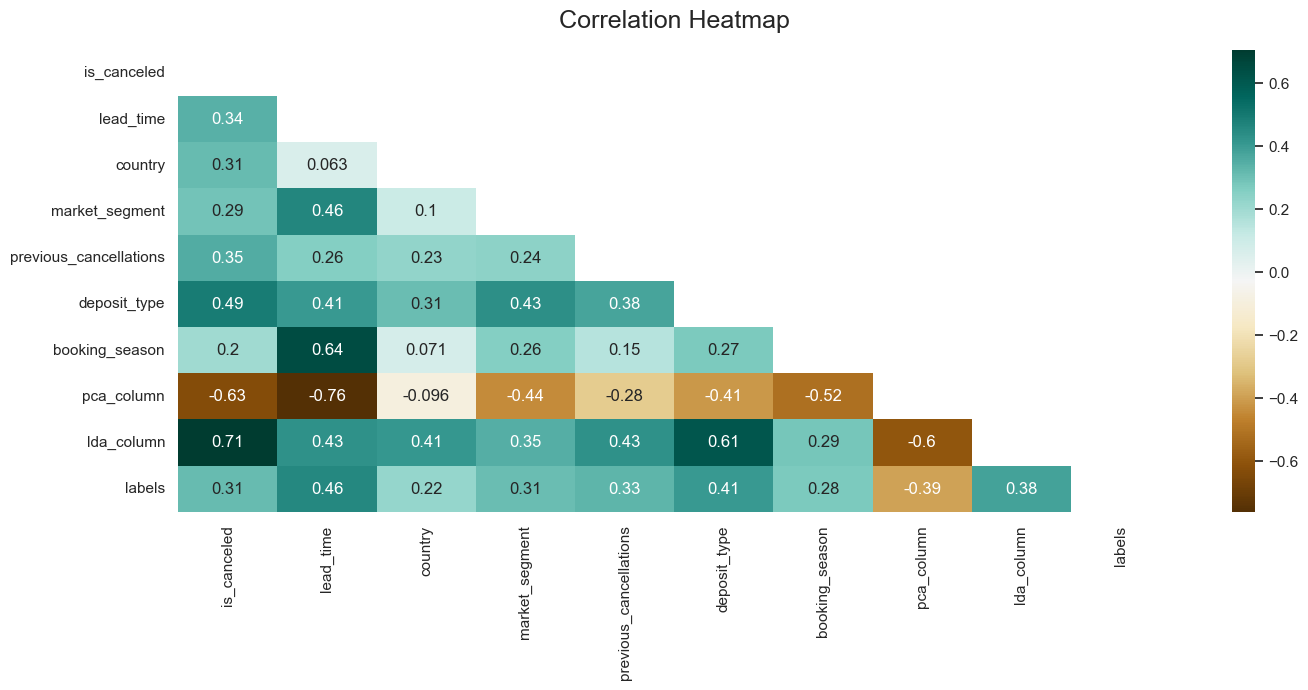

In [85]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_encoded.corr(), mask=mask,  annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Modelling

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=199,shuffle=True,stratify=y)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     10063
         1.0       0.95      0.92      0.93      5790

    accuracy                           0.95     15853
   macro avg       0.95      0.95      0.95     15853
weighted avg       0.95      0.95      0.95     15853





Text(67.25, 0.5, 'True')

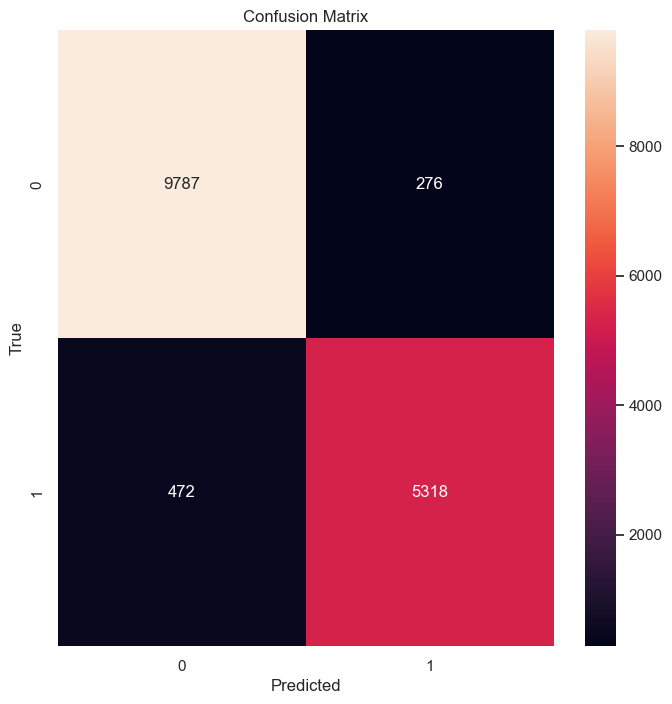

In [87]:
RandomForest = RandomForestClassifier()
max_features= ['sqrt']
n_estimators=[100]
bootstrap = [True] #resable method use
random_state=[199]
param_grid=dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,random_state=random_state )
gridsearch = GridSearchCV(RandomForest,param_grid,cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)

gridsearch.best_params_
y_predRandom=gridsearch.predict(X_test)
#Reporta
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [88]:
print("Accuracy : ",accuracy_score(y_test, y_predRandom))
print("Pccuracy : ",precision_score (y_test, y_predRandom))
print("Recall : ",recall_score(y_test, y_predRandom))


Accuracy :  0.9528165016085284
Pccuracy :  0.9506614229531641
Recall :  0.9184801381692573


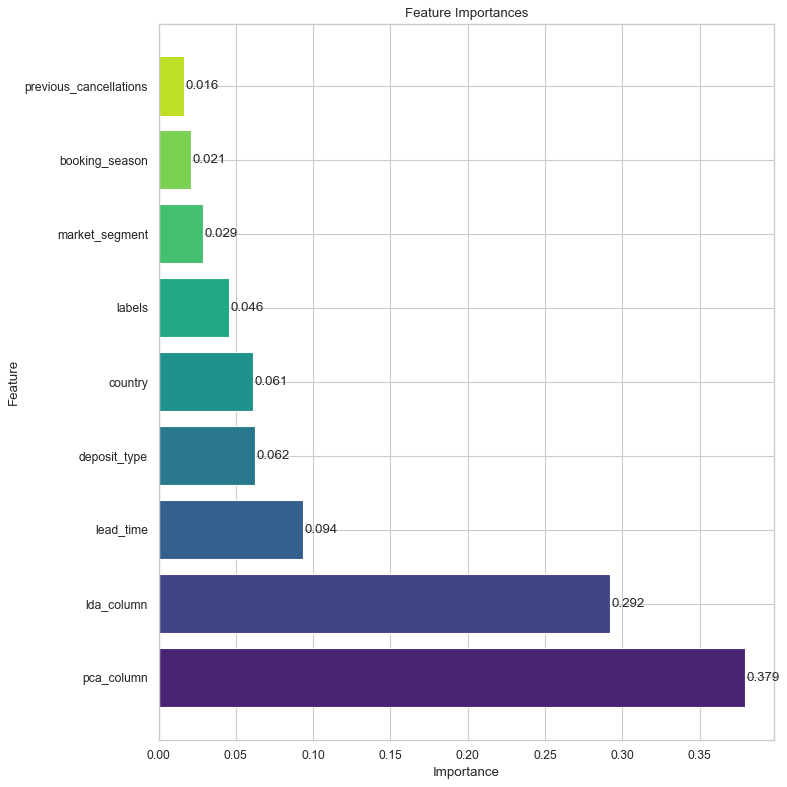

In [89]:

from sklearn.feature_selection import SelectFromModel

# Assuming you have already defined X_train and y_train
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
model.fit(X_train, y_train)

fi = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
fi = fi.sort_values('importance', ascending=False)

# Set a custom color palette
custom_colors = sns.color_palette('viridis', n_colors=len(fi))

plt.figure(figsize=(10, 10), dpi=80)
bars = plt.barh(fi['feature'], fi['importance'], color=custom_colors)

# Adding labels for feature importance values
for bar, importance in zip(bars, fi['importance']):
    plt.text(
        bar.get_width() + 0.001,  # Adjust the position for the label
        bar.get_y() + bar.get_height() / 2,
        f'{importance:.3f}',
        ha='left',
        va='center'
    )

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [90]:
df_encoded.to_csv("Final_cleandata.csv")


In [91]:
df_encoded

,is_canceled,lead_time,country,market_segment,previous_cancellations,deposit_type,booking_season,pca_column,lda_column,labels
0,1.0,0.232968,0.767296,0.253094,0.0,0.0,0.5,0.171579,1.0,0.297775
1,1.0,0.454138,0.767296,0.253094,0.0,0.0,1.0,-0.489285,1.0,0.272783
2,1.0,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
3,1.0,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
4,1.0,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
...,...,...,...,...,...,...,...,...,...,...
79259,1.0,0.406861,0.767296,0.256029,0.0,0.0,1.0,-0.770159,1.0,0.262951
79260,1.0,0.770909,0.767296,0.256029,0.0,0.5,1.0,-0.841001,1.0,0.262951
79261,1.0,0.770909,0.201258,0.256029,0.0,0.5,1.0,-0.820361,1.0,0.262951
79262,1.0,0.770909,0.767296,0.256029,0.0,0.5,1.0,-0.841009,1.0,0.262951


In [92]:

# Calculate predictions using the test data
y_pred_test = model.predict(X_test)

# Calculate accuracy, precision, and recall scores for the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
print("\nTrain Results:")
print("Accuracy : ",accuracy_score(y_test, y_predRandom))
print("Pccuracy : ",precision_score (y_test, y_predRandom))
print("Recall : ",recall_score(y_test, y_predRandom))

print("\nTest Results:")
print("Test Accuracy Score:", accuracy_test)
print("Test Precision Score:", precision_test)
print("Test Recall Score:", recall_test)



Train Results:
Accuracy :  0.9528165016085284
Pccuracy :  0.9506614229531641
Recall :  0.9184801381692573

Test Results:
Test Accuracy Score: 0.9528795811518325
Test Precision Score: 0.9497057249866239
Test Recall Score: 0.9196891191709845


In [93]:
# Save the trained model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(gridsearch, model_file)

In [103]:
# Save the trained model using pickle
with open('random_forest_model.sav', 'wb') as model_file:
    pickle.dump(gridsearch, model_file)

In [99]:
X

,lead_time,country,market_segment,previous_cancellations,deposit_type,booking_season,pca_column,lda_column,labels
0,0.232968,0.767296,0.253094,0.0,0.0,0.5,0.171579,1.0,0.297775
1,0.454138,0.767296,0.253094,0.0,0.0,1.0,-0.489285,1.0,0.272783
2,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
3,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
4,0.553759,0.767296,0.577737,0.0,0.5,1.0,-0.034274,1.0,0.272783
...,...,...,...,...,...,...,...,...,...
79259,0.406861,0.767296,0.256029,0.0,0.0,1.0,-0.770159,1.0,0.262951
79260,0.770909,0.767296,0.256029,0.0,0.5,1.0,-0.841001,1.0,0.262951
79261,0.770909,0.201258,0.256029,0.0,0.5,1.0,-0.820361,1.0,0.262951
79262,0.770909,0.767296,0.256029,0.0,0.5,1.0,-0.841009,1.0,0.262951


In [102]:
input_data=(0.56,0.76,0.2,0.0,0.0,0.5,0.1,1.0,0.29)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshapeed = input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshapeed)
print(prediction)

if(prediction[0]==0):
    print('no iptal')
else:
    print('yes iptal')


[0.]
no iptal


c:\Users\Mazi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
